In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

In [42]:
#Read datda
def read_table(path=None, headers= [0], rows=[0]):
    if path:
        for i,v in enumerate(rows):
            if i>0:
                new = pd.read_excel(path, header=headers[i], nrows=rows[i])
                dataset = pd.concat([dataset,new])
            else:
                dataset = pd.read_excel(path, header=headers[i], nrows=rows[i])   
        return dataset

    
#Clean table columns 
def clean_cols(dataset=None, todropna=False, level=None):
    ''' 
    dataset: Enter dataframe name.
    todropna: boolean, if True drop columns which has all their values as empty.
    level: int, to decide which level of header to keep. If the dataframe does not have MultiIndex, keep it as default.
    '''
    if type(level)==int:
        #dataset.drop(dataset.columns[-1], axis=1, inplace= True)
        dataset.columns = dataset.columns.get_level_values(level)
        dataset.drop(dataset.columns[-1], axis=1, inplace= True)
    if todropna:
        dataset.dropna(how='all', axis=1, inplace=True)

        

def clean_rows(dataset= None, index_col=None, init_index_col_val= 'الكتب والمجلات', cntrl_col= None, valu_col= None, remove_totl=True, row_fltr_txt= 'مجموع'):
    dataset[index_col] = np.where(pd.isna(dataset[cntrl_col]), dataset[valu_col].str.strip(), None)
    if pd.isnull(dataset[index_col].iloc[0]):
        dataset[index_col].iloc[0] = init_index_col_val
    dataset[index_col].fillna(method='ffill', inplace= True)
    if remove_totl:
        dataset = dataset[~dataset[valu_col].str.contains(row_fltr_txt, na=False)]
    dataset = dataset[pd.notnull(dataset[cntrl_col])]

In [43]:
#2007 Data

pub_2007 = read_table(path= r'2007/Table3-49.xls', headers= [[6,7], [65,66], [124,125], [189,190], [255,256], [318,319]], 
          rows= [49, 49, 55, 56, 53, 47])
clean_cols(dataset= pub_2007, todropna=True, level=0)
clean_rows(dataset= pub_2007, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2007 = pub_2007[~pub_2007['البرامج'].str.contains('مجموع')]
pub_2007 = pub_2007[pd.notnull(pub_2007['المنتظمون'])]
pub_2007.rename(columns= {'الناجحون': 'المجتازون', 'نسبة النجاح':'نسبة المجتازين'}, inplace=True)



privt_2007 = read_table(path= r'2007/Table3-50.xls', headers= [[6,7]], rows= [38])
clean_cols(dataset= privt_2007, todropna=True, level=0)
clean_rows(dataset= privt_2007, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2007 = privt_2007[~privt_2007['البرامج'].str.contains('مجموع')]
privt_2007 = privt_2007[pd.notnull(privt_2007['المنتظمون'])]
privt_2007.rename(columns= {'الناجحون': 'المجتازون', 'نسبة النجاح':'نسبة المجتازين'}, inplace=True)



pappp_2007 = read_table(path= r'2007/Table3-51.xls', headers= [[6,7]], rows= [23])
clean_cols(dataset= pappp_2007, todropna=True, level=0)
clean_rows(dataset= pappp_2007, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pappp_2007 = pappp_2007[~pappp_2007['البرامج'].str.contains('مجموع')]
pappp_2007 = pappp_2007[pd.notnull(pappp_2007['المنتظمون'])]




pappv_2007 = read_table(path= r'2007/Table3-52.xls', headers= [[6,7]], rows= [9])
clean_cols(dataset= pappv_2007, todropna=True, level=0)
clean_rows(dataset= pappv_2007, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pappv_2007 = pappv_2007[~pappv_2007['البرامج'].str.contains('مجموع')]
pappv_2007 = pappv_2007[pd.notnull(pappv_2007['المنتظمون'])]
papp_2007 = pd.concat([pappp_2007.drop('القطاعات', axis=1), pappv_2007.drop('القطاعات', axis=1)], 
                      keys=['أ- البرامج الإعدادية العامة:', 'ب- البرامج الإعدادية الخاصة:'])
papp_2007 = papp_2007.reset_index().drop('level_1', axis=1)
papp_2007.rename(columns={'الناجحون':'الخريجون', 'level_0':'القطاعات'}, inplace=True)


libdoc_2007 = read_table(path= r'2007/Table3-53.xls', headers= [[6,7]], rows= [17])
clean_cols(dataset= libdoc_2007, todropna=True, level=1)
clean_rows(dataset= libdoc_2007, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2007 = libdoc_2007[~libdoc_2007['المواد المضافة'].str.contains('مجموع')]
libdoc_2007 = libdoc_2007[pd.notnull(libdoc_2007['العدد Number'])]

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
#2008 Data

pub_2008 = read_table(path= r'2008/Table3-37.xls', headers= [[6,7], [63,64], [121,122], [186,187], [257,258], [319,320]], 
          rows= [47, 48, 55, 61, 52, 46])
clean_cols(dataset= pub_2008, todropna=True, level=0)
clean_rows(dataset= pub_2008, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2008 = pub_2008[~pub_2008['البرامج'].str.contains('مجموع')]
pub_2008 = pub_2008[pd.notnull(pub_2008['المنتظمون'])]
pub_2008.rename(columns= {'الناجحون': 'المجتازون', 'نسبة النجاح':'نسبة المجتازين'}, inplace=True)



privt_2008 = read_table(path= r'2008/Table3-38.xls', headers= [[6,7]], rows= [32])
clean_cols(dataset= privt_2008, todropna=True, level=0)
clean_rows(dataset= privt_2008, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2008 = privt_2008[~privt_2008['البرامج'].str.contains('مجموع')]
privt_2008 = privt_2008[pd.notnull(privt_2008['المنتظمون'])]
privt_2008.rename(columns= {'الناجحون': 'المجتازون', 'نسبة النجاح':'نسبة المجتازين'}, inplace=True)


papp_2008 = read_table(path= r'2008/Table3-39.xls', headers= [[6,7]], rows= [18])
clean_cols(dataset= papp_2008, todropna=True, level=0)
clean_rows(dataset= papp_2008, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
papp_2008 = papp_2008[~papp_2008['البرامج'].str.contains('مجموع')]
papp_2008 = papp_2008[pd.notnull(papp_2008['المنتظمون'])]
papp_2008.rename(columns={'الناجحون':'الخريجون'}, inplace=True)



libdoc_2008 = read_table(path= r'2008/Table3-40.xls', headers= [[6,7]], rows= [16])
clean_cols(dataset= libdoc_2008, todropna=True, level=1)
clean_rows(dataset= libdoc_2008, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2008 = libdoc_2008[~libdoc_2008['المواد المضافة'].str.contains('مجموع')]
libdoc_2008 = libdoc_2008[pd.notnull(libdoc_2008['العدد Number'])]

In [45]:
#2009 Data

pub_2009 = read_table(path= r'2009/Table3-40.xls', headers= [[6,7], [63,64], [119,120], [186,187], [250,251], [313,314]], 
          rows= [47, 46, 57, 54, 53, 40])
clean_cols(dataset= pub_2009, todropna=True, level=0)
clean_rows(dataset= pub_2009, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2009 = pub_2009[~pub_2009['البرامج'].str.contains('مجموع')]
pub_2009 = pub_2009[pd.notnull(pub_2009['المنتظمون'])]
pub_2009.rename(columns= {'الناجحون': 'المجتازون', 'نسبة النجاح':'نسبة المجتازين'}, inplace=True)



privt_2009 = read_table(path= r'2009/Table3-41.xls', headers= [[6,7]], rows= [40])
clean_cols(dataset= privt_2009, todropna=True, level=0)
clean_rows(dataset= privt_2009, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2009 = privt_2009[~privt_2009['البرامج'].str.contains('مجموع')]
privt_2009 = privt_2009[pd.notnull(privt_2009['المنتظمون'])]
privt_2009.rename(columns= {'الناجحون': 'المجتازون', 'نسبة النجاح':'نسبة المجتازين'}, inplace=True)


papp_2009 = read_table(path= r'2009/Table3-42.xls', headers= [[6,7]], rows= [18])
clean_cols(dataset= papp_2009, todropna=True, level=0)
clean_rows(dataset= papp_2009, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
papp_2009 = papp_2009[~papp_2009['البرامج'].str.contains('مجموع')]
papp_2009 = papp_2009[pd.notnull(papp_2009['المنتظمون'])]
papp_2009.rename(columns={'الناجحون':'الخريجون'}, inplace=True)


libdoc_2009 = read_table(path= r'2009/Table3-43.xls', headers= [[6,7]], rows= [16])
clean_cols(dataset= libdoc_2009, todropna=True, level=1)
clean_rows(dataset= libdoc_2009, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2009 = libdoc_2009[~libdoc_2009['المواد المضافة'].str.contains('مجموع')]
libdoc_2009 = libdoc_2009[pd.notnull(libdoc_2009['العدد Number'])]

In [46]:
#2010 Data

pub_2010 = read_table(path= r'2010/Table3-43.xls', headers= [[6,7], [62,63], [118,119], [183,184], [238,239], [295,296]], 
          rows= [46, 46, 55, 45, 47, 38])
clean_cols(dataset= pub_2010, todropna=True, level=0)
clean_rows(dataset= pub_2010, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2010 = pub_2010[~pub_2010['البرامج'].str.contains('مجموع')]
pub_2010 = pub_2010[pd.notnull(pub_2010['المنتظمون'])]
pub_2010.rename(columns= {'الناجحون': 'المجتازون', 'نسبة النجاح':'نسبة المجتازين'}, inplace=True)



privt_2010 = read_table(path= r'2010/Table3-44.xls', headers= [[6,7], [49,50]], rows= [35, 29])
clean_cols(dataset= privt_2010, todropna=True, level=0)
clean_rows(dataset= privt_2010, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2010 = privt_2010[~privt_2010['البرامج'].str.contains('مجموع')]
privt_2010 = privt_2010[pd.notnull(privt_2010['المنتظمون'])]
privt_2010.rename(columns= {'الناجحون': 'المجتازون', 'نسبة النجاح':'نسبة المجتازين'}, inplace=True)


papp_2010 = read_table(path= r'2010/Table3-45.xls', headers= [[6,7]], rows= [21])
clean_cols(dataset= papp_2010, todropna=True, level=0)
clean_rows(dataset= papp_2010, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
papp_2010 = papp_2010[~papp_2010['البرامج'].str.contains('مجموع')]
papp_2010 = papp_2010[pd.notnull(papp_2010['المنتظمون'])]
papp_2010.rename(columns={'الناجحون':'الخريجون'}, inplace=True)


libdoc_2010 = read_table(path= r'2010/Table3-46.xls', headers= [[6,7]], rows= [16])
clean_cols(dataset= libdoc_2010, todropna=True, level=1)
clean_rows(dataset= libdoc_2010, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2010 = libdoc_2010[~libdoc_2010['المواد المضافة'].str.contains('مجموع')]
libdoc_2010 = libdoc_2010[pd.notnull(libdoc_2010['العدد Number'])]

In [47]:
#2011 Data

pub_2011 = read_table(path= r'2011/Table3-47.xls', headers= [[6,7], [46,47], [101,102], [152,153], [204,205], [242,243], [296,297]], 
          rows= [31, 46, 42, 43, 29, 45, 37])
clean_cols(dataset= pub_2011, todropna=True, level=0)
clean_rows(dataset= pub_2011, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2011 = pub_2011[~pub_2011['البرامج'].str.contains('مجموع')]
pub_2011 = pub_2011[pd.notnull(pub_2011['المنتظمون'])]



privt_2011 = read_table(path= r'2011/Table3-48.xls', headers= [[6,7], [47,48]], rows= [32, 36])
clean_cols(dataset= privt_2011, todropna=True, level=0)
clean_rows(dataset= privt_2011, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2011 = privt_2011[~privt_2011['البرامج'].str.contains('مجموع')]
privt_2011 = privt_2011[pd.notnull(privt_2011['المنتظمون'])]


papp_2011 = read_table(path= r'2011/Table3-49.xls', headers= [[6,7]], rows= [22])
clean_cols(dataset= papp_2011, todropna=True, level=0)
clean_rows(dataset= papp_2011, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
papp_2011 = papp_2011[~papp_2011['البرامج'].str.contains('مجموع')]
papp_2011 = papp_2011[pd.notnull(papp_2011['المنتظمون'])]


libdoc_2011 = read_table(path= r'2011/Table3-50.xls', headers= [[6,7]], rows= [16])
clean_cols(dataset= libdoc_2011, todropna=True, level=1)
clean_rows(dataset= libdoc_2011, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2011 = libdoc_2011[~libdoc_2011['المواد المضافة'].str.contains('مجموع')]
libdoc_2011 = libdoc_2011[pd.notnull(libdoc_2011['العدد Number'])]

In [48]:
#2012 Data

pub_2012 = read_table(path= r'2012/Table3-47.xlsx', headers= [[6,7]], 
          rows= [248])
clean_cols(dataset= pub_2012, todropna=True, level=0)
clean_rows(dataset= pub_2012, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2012 = pub_2012[~pub_2012['البرامج'].str.contains('مجموع')]
pub_2012 = pub_2012[pd.notnull(pub_2012['المنتظمون'])]



privt_2012 = read_table(path= r'2012/Table3-48.xls', headers= [[6,7]], rows= [67])
clean_cols(dataset= privt_2012, todropna=True, level=0)
clean_rows(dataset= privt_2012, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2012 = privt_2012[~privt_2012['البرامج'].str.contains('مجموع')]
privt_2012 = privt_2012[pd.notnull(privt_2012['المنتظمون'])]


papp_2012 = read_table(path= r'2012/Table3-49.xls', headers= [[6,7]], rows= [20])
clean_cols(dataset= papp_2012, todropna=True, level=0)
clean_rows(dataset= papp_2012, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
papp_2012 = papp_2012[~papp_2012['البرامج'].str.contains('مجموع')]
papp_2012 = papp_2012[pd.notnull(papp_2012['المنتظمون'])]


libdoc_2012 = read_table(path= r'2012/Table3-50.xls', headers= [[6,7]], rows= [16])
clean_cols(dataset= libdoc_2012, todropna=True, level=1)
clean_rows(dataset= libdoc_2012, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2012 = libdoc_2012[~libdoc_2012['المواد المضافة'].str.contains('مجموع')]
libdoc_2012 = libdoc_2012[pd.notnull(libdoc_2012['العدد Number'])]

In [49]:
#2013 Data

pub_2013 = read_table(path= r'2013/20-3.xlsx', headers= [[5,6]], rows= [251])
clean_cols(dataset= pub_2013, todropna=True, level=0)
clean_rows(dataset= pub_2013, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2013 = pub_2013[~pub_2013['البرامج'].str.contains('مجموع', na=False)]
pub_2013 = pub_2013[pd.notnull(pub_2013['المنتظمون'])]
pub_2013.rename(columns= {'الناجحون': 'المجتازون', 'نسبة النجاح':'نسبة المجتازين'}, inplace=True)



privt_2013 = read_table(path= r'2013/21-3.xlsx', headers= [[5,6]], rows= [60])
clean_cols(dataset= privt_2013, todropna=True, level=0)
clean_rows(dataset= privt_2013, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2013 = privt_2013[~privt_2013['البرامج'].str.contains('مجموع')]
privt_2013 = privt_2013[pd.notnull(privt_2013['المنتظمون'])]


papp_2013 = read_table(path= r'2013/22-3.xlsx', headers= [[5,6]], rows= [18])
clean_cols(dataset= papp_2013, todropna=True, level=0)
clean_rows(dataset= papp_2013, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
papp_2013 = papp_2013[~papp_2013['البرامج'].str.contains('مجموع')]
papp_2013 = papp_2013[pd.notnull(papp_2013['المنتظمون'])]


libdoc_2013 = read_table(path= r'2013/23-3.xlsx', headers= [[5,6]], rows= [14])
clean_cols(dataset= libdoc_2013, todropna=True, level=1)
clean_rows(dataset= libdoc_2013, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2013 = libdoc_2013[~libdoc_2013['المواد المضافة'].str.contains('مجموع')]
libdoc_2013 = libdoc_2013[pd.notnull(libdoc_2013['العدد Number'])]


bus_2013 = read_table(path= r'2013/24-3.xlsx', headers= [[5,6]], rows= [69])
clean_cols(dataset= bus_2013, todropna=True, level=0)
clean_rows(dataset= bus_2013, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
bus_2013 = bus_2013[~bus_2013['البرامج'].str.contains('مجموع', na=False)]
bus_2013 = bus_2013[pd.notnull(bus_2013['المنتظمون'])]

In [50]:
#2014 Data

pub_2014 = read_table(path= r'2014/20-3.xlsx', headers= [[5,6]], rows= [243])
clean_cols(dataset= pub_2014, todropna=True, level=0)
clean_rows(dataset= pub_2014, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2014 = pub_2014[~pub_2014['البرامج'].str.contains('مجموع', na=False)]
pub_2014 = pub_2014[pd.notnull(pub_2014['المنتظمون'])]


privt_2014 = read_table(path= r'2014/21-3.xlsx', headers= [[5,6]], rows= [60])
clean_cols(dataset= privt_2014, todropna=True, level=0)
clean_rows(dataset= privt_2014, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2014 = privt_2014[~privt_2014['البرامج'].str.contains('مجموع')]
privt_2014 = privt_2014[pd.notnull(privt_2014['المنتظمون'])]


papp_2014 = read_table(path= r'2014/22-3.xlsx', headers= [[5,6]], rows= [25])
clean_cols(dataset= papp_2014, todropna=True, level=0)
clean_rows(dataset= papp_2014, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
papp_2014 = papp_2014[~papp_2014['البرامج'].str.contains('مجموع')]
papp_2014 = papp_2014[pd.notnull(papp_2014['المنتظمون'])]



libdoc_2014 = read_table(path= r'2014/23-3.xlsx', headers= [[5,6]], rows= [14])
clean_cols(dataset= libdoc_2014, todropna=True, level=1)
clean_rows(dataset= libdoc_2014, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2014 = libdoc_2014[~libdoc_2014['المواد المضافة'].str.contains('مجموع')]
libdoc_2014 = libdoc_2014[pd.notnull(libdoc_2014['العدد Number'])]


bus_2014 = read_table(path= r'2014/24-3.xlsx', headers= [[5,6]], rows= [82])
clean_cols(dataset= bus_2014, todropna=True, level=0)
clean_rows(dataset= bus_2014, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
bus_2014 = bus_2014[~bus_2014['البرامج'].str.contains('مجموع', na=False)]
bus_2014 = bus_2014[pd.notnull(bus_2014['المنتظمون'])]

In [51]:
#2015 Data

pub_2015 = read_table(path= r'2015/20-3.xlsx', headers= [[3,4]], rows= [247])
clean_cols(dataset= pub_2015, todropna=True, level=0)
clean_rows(dataset= pub_2015, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2015 = pub_2015[~pub_2015['البرامج'].str.contains('مجموع', na=False)]
pub_2015 = pub_2015[pd.notnull(pub_2015['المنتظمون'])]


privt_2015 = read_table(path= r'2015/21-3.xlsx', headers= [[4,5]], rows= [67])
clean_cols(dataset= privt_2015, todropna=True, level=0)
clean_rows(dataset= privt_2015, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2015 = privt_2015[~privt_2015['البرامج'].str.contains('مجموع', na=False)]
privt_2015 = privt_2015[pd.notnull(privt_2015['المنتظمون'])]


papp_2015 = read_table(path= r'2015/22-3.xlsx', headers= [[4,5]], rows= [32])
clean_cols(dataset= papp_2015, todropna=True, level=0)
clean_rows(dataset= papp_2015, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
papp_2015 = papp_2015[~papp_2015['البرامج'].str.contains('مجموع', na=False)]
papp_2015 = papp_2015[pd.notnull(papp_2015['المنتظمون'])]


libdoc_2015 = read_table(path= r'2015/23-3.xlsx', headers= [[4,5]], rows= [17])
clean_cols(dataset= libdoc_2015, todropna=True, level=1)
clean_rows(dataset= libdoc_2015, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2015 = libdoc_2015[~libdoc_2015['المواد المضافة'].str.contains('مجموع', na=False)]
libdoc_2015 = libdoc_2015[pd.notnull(libdoc_2015['العدد Number'])]


bus_2015 = read_table(path= r'2015/24-3.xlsx', headers= [[3,4]], rows= [84])
clean_cols(dataset= bus_2015, todropna=True, level=0)
clean_rows(dataset= bus_2015, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
bus_2015 = bus_2015[~bus_2015['البرامج'].str.contains('مجموع', na=False)]
bus_2015 = bus_2015[pd.notnull(bus_2015['المنتظمون'])]

In [52]:
#2016 Data

pub_2016 = read_table(path= r'2016/20-3.xlsx', headers= [[4,5]], rows= [216])
clean_cols(dataset= pub_2016, todropna=True, level=0)
clean_rows(dataset= pub_2016, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
pub_2016 = pub_2016[~pub_2016['البرامج'].str.contains('مجموع', na=False)]
pub_2016 = pub_2016[pd.notnull(pub_2016['المنتظمون'])]


privt_2016 = read_table(path= r'2016/21-3.xlsx', headers= [[4,5]], rows= [24])
clean_cols(dataset= privt_2016, todropna=True, level=0)
clean_rows(dataset= privt_2016, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
privt_2016 = privt_2016[~privt_2016['البرامج'].str.contains('مجموع', na=False)]
privt_2016 = privt_2016[pd.notnull(privt_2016['المنتظمون'])]


papp_2016 = read_table(path= r'2016/22-3.xlsx', headers= [[2,3]], rows= [22])
clean_cols(dataset= papp_2016, todropna=True, level=0)
clean_rows(dataset= papp_2016, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
papp_2016 = papp_2016[~papp_2016['البرامج'].str.contains('مجموع', na=False)]
papp_2016 = papp_2016[pd.notnull(papp_2016['المنتظمون'])]


libdoc_2016 = read_table(path= r'2016/23-3.xlsx', headers= [[4,5]], rows= [17])
clean_cols(dataset= libdoc_2016, todropna=True, level=1)
clean_rows(dataset= libdoc_2016, index_col='تصنيف المواد', init_index_col_val= 'الكتب والمجلات', 
           cntrl_col= 'العدد Number', valu_col= 'المواد المضافة', remove_totl=True,  row_fltr_txt= 'مجموع')
libdoc_2016 = libdoc_2016[~libdoc_2016['المواد المضافة'].str.contains('مجموع', na=False)]
libdoc_2016 = libdoc_2016[pd.notnull(libdoc_2016['العدد Number'])]


bus_2016 = read_table(path= r'2016/24-3.xlsx', headers= [[3,4]], rows= [55])
clean_cols(dataset= bus_2016, todropna=True, level=0)
clean_rows(dataset= bus_2016, index_col='القطاعات', init_index_col_val= None, 
           cntrl_col= 'المنتظمون', valu_col= 'البرامج', remove_totl=True,  row_fltr_txt= 'مجموع')
bus_2016 = bus_2016[~bus_2016['البرامج'].str.contains('مجموع', na=False)]
bus_2016 = bus_2016[pd.notnull(bus_2016['المنتظمون'])]

In [53]:
#with pd.option_context("display.max_rows", 1000): display(bus_2016)

In [54]:
# Data Concatenation

pub = pd.concat([pub_2007, pub_2008, pub_2009, pub_2010, pub_2011, pub_2012, pub_2013, pub_2014, pub_2015, pub_2016],
         keys = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], sort=False)
pub = pub.reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'السنة'})
pub['القطاعات'] = (pub['القطاعات']).str.replace(u'\xa0', ' ')


privt = pd.concat([privt_2007, privt_2008, privt_2009, privt_2010, privt_2011, privt_2012, privt_2013, privt_2014, 
                   privt_2015, privt_2016], keys = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], sort=False)
privt = privt.reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'السنة'})


papp = pd.concat([papp_2007, papp_2008, papp_2009, papp_2010, papp_2011, papp_2012, papp_2013, papp_2014, 
                   papp_2015, papp_2016], keys = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], sort=False)
papp = papp.reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'السنة'})

libdoc = pd.concat([libdoc_2007, libdoc_2008, libdoc_2009, libdoc_2010, libdoc_2011, libdoc_2012, libdoc_2013, libdoc_2014, 
                   libdoc_2015, libdoc_2016], keys = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], sort=False)
libdoc = libdoc.reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'السنة'})
libdoc.rename(columns={'العدد Number':'العدد'},inplace=True)

bus = pd.concat([bus_2013, bus_2014, bus_2015, bus_2016], keys = [2013, 2014, 2015, 2016], sort=False)
bus = bus.reset_index().drop('level_1', axis=1).rename(columns={'level_0': 'السنة'})
bus['القطاعات'] = (bus['القطاعات']).str.replace(u'\xa0', ' ')


allsectors = pd.concat([pub, privt, bus, papp], keys= ['تدريب عام', 'تدريب خاص', 'تدريب مركز الأعمال', 'البرامج الإعدادية'])
allsectors = allsectors.reset_index().drop('level_1', axis=1).rename(columns={'level_0':'نوع التدريب'})

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



## Verifying Headers and Categories

In [55]:
for x in range(2013, 2017):
    print(globals()['bus_%s' % x].columns)

Index(['البرامج', 'المنتظمون', 'المجتازون', 'نسبة المجتازين', 'القطاعات'], dtype='object')
Index(['البرامج', 'المنتظمون', 'المجتازون', 'نسبة المجتازين', 'القطاعات'], dtype='object')
Index(['البرامج', 'المنتظمون', 'المجتازون', 'نسبة المجتازين', 'القطاعات'], dtype='object')
Index(['البرامج', 'المنتظمون', 'المجتازون', 'نسبة المجتازين', 'القطاعات'], dtype='object')


In [56]:
pub['القطاعات'].unique()

array(['قطاع إدارة المواد:', 'قطاع الإحصاء:', 'قطاع الإدارة الصحية:',
       'قطاع الإدارة العامة:', 'قطاع الإدارة المكتبية:',
       'قطاع الإدارة الهندسية والمشروعات:', 'قطاع الموارد البشرية:',
       'قطاع الحاسب الآلي:', 'قطاع السلوك التنظيمي:',
       'قطاع العلاقات العامة والإعلام:', 'قطاع الإقتصاد والميزانية:',
       'قطاع المحاسبة:', 'قطاع المكتبات والمعلومات:', 'قطاع القانون:',
       'قطاع تقنية المعلومات:', 'قطاع المعلومات:'], dtype=object)

In [57]:
bus['القطاعات'].unique()

array(['قطاع الإدارة العامة:', 'قطاع الإدارة المكتبية:',
       'قطاع الإدارة الهندسية والمشروعات:', 'قطاع الإقتصاد والميزانية:',
       'قطاع الحاسب الآلي:', 'قطاع السلوك التنظيمي:', 'قطاع القانون:',
       'قطاع المحاسبة:', 'قطاع الموارد البشرية:',
       'قطاع العلاقات العامة والإعلام:', 'قطاع الإحصاء:',
       'قطاع إدارة المواد:', 'قطاع الإدارة الصحية:'], dtype=object)

In [58]:
print(set(pub['القطاعات']) - set(privt['القطاعات']))
print(set(privt['القطاعات']) - set(pub['القطاعات']))

set()
set()


In [59]:
print(set(pub['القطاعات']) - set(bus['القطاعات']))
print(set(bus['القطاعات']) - set(pub['القطاعات']))

{'قطاع المكتبات والمعلومات:', 'قطاع المعلومات:', 'قطاع تقنية المعلومات:'}
set()


In [60]:
print(set(privt['القطاعات']) - set(bus['القطاعات']))
print(set(bus['القطاعات']) - set(privt['القطاعات']))

{'قطاع المكتبات والمعلومات:', 'قطاع المعلومات:', 'قطاع تقنية المعلومات:'}
set()


In [61]:
allsectors['المنتظمون'][allsectors['نوع التدريب']=='تدريب عام'].sum()/ allsectors['المنتظمون'].sum()

0.925444956475713

In [62]:
for i in pub['القطاعات'].unique():
    print(i, pub['المنتظمون'][pub['القطاعات']==i].sum()/pub['المنتظمون'].sum() * 100)

قطاع إدارة المواد: 4.441018783746102
قطاع الإحصاء: 4.129223807954574
قطاع الإدارة الصحية: 2.4392253289056756
قطاع الإدارة العامة: 13.454555248548758
قطاع الإدارة المكتبية: 25.549602017795124
قطاع الإدارة الهندسية والمشروعات: 3.167539101117899
قطاع الموارد البشرية: 7.820698877031103
قطاع الحاسب الآلي: 5.733985652361277
قطاع السلوك التنظيمي: 12.978307434915967
قطاع العلاقات العامة والإعلام: 2.411182792973206
قطاع الإقتصاد والميزانية: 1.8657000177444296
قطاع المحاسبة: 7.7047263555476695
قطاع المكتبات والمعلومات: 2.8728548252173693
قطاع القانون: 4.147126669877563
قطاع تقنية المعلومات: 1.0583284747395372
قطاع المعلومات: 0.2259246115237395


In [63]:
for i in privt['القطاعات'].unique():
    print(i, privt['المنتظمون'][privt['القطاعات']==i].sum()/privt['المنتظمون'].sum() * 100)

قطاع الإقتصاد والميزانية: 39.51763641845041
قطاع الموارد البشرية: 2.2610792885137174
قطاع السلوك التنظيمي: 14.036780223093157
قطاع القانون: 14.097075670786854
قطاع المحاسبة: 7.440458245402472
قطاع الإدارة الصحية: 1.0009044317154054
قطاع الإدارة الهندسية والمشروعات: 0.7838408200180885
قطاع الحاسب الآلي: 0.9767862526379258
قطاع الإدارة العامة: 12.511305396442568
قطاع الإدارة المكتبية: 5.691890262285197
قطاع إدارة المواد: 0.7416340066324992
قطاع المكتبات والمعلومات: 0.0964727163099186
قطاع العلاقات العامة والإعلام: 0.2411817907747965
قطاع الإحصاء: 0.33162496231534516
قطاع المعلومات: 0.12059089538739826
قطاع تقنية المعلومات: 0.1507386192342478


In [64]:
for i in bus['القطاعات'].unique():
    print(i, bus['المنتظمون'][bus['القطاعات']==i].sum()/bus['المنتظمون'].sum() * 100)

قطاع الإدارة العامة: 13.605648008068583
قطاع الإدارة المكتبية: 28.875441250630356
قطاع الإدارة الهندسية والمشروعات: 2.934947049924357
قطاع الإقتصاد والميزانية: 0.13111447302067575
قطاع الحاسب الآلي: 0.751386787695411
قطاع السلوك التنظيمي: 44.76550680786687
قطاع القانون: 2.783661119515885
قطاع المحاسبة: 2.2541603630862332
قطاع الموارد البشرية: 2.8240040342914776
قطاع العلاقات العامة والإعلام: 0.4437720625315179
قطاع الإحصاء: 0.11094301563287948
قطاع إدارة المواد: 0.4185577407967726
قطاع الإدارة الصحية: 0.10085728693898136


In [65]:
for i in bus['القطاعات'].unique():
    print(i, bus['المنتظمون'][bus['القطاعات']==i].sum()/bus['المنتظمون'].sum() * 100)

قطاع الإدارة العامة: 13.605648008068583
قطاع الإدارة المكتبية: 28.875441250630356
قطاع الإدارة الهندسية والمشروعات: 2.934947049924357
قطاع الإقتصاد والميزانية: 0.13111447302067575
قطاع الحاسب الآلي: 0.751386787695411
قطاع السلوك التنظيمي: 44.76550680786687
قطاع القانون: 2.783661119515885
قطاع المحاسبة: 2.2541603630862332
قطاع الموارد البشرية: 2.8240040342914776
قطاع العلاقات العامة والإعلام: 0.4437720625315179
قطاع الإحصاء: 0.11094301563287948
قطاع إدارة المواد: 0.4185577407967726
قطاع الإدارة الصحية: 0.10085728693898136


## Performing Calculations

In [66]:
# % of 2016 main sector joiners from same sectors in 2013 when the Center started working - This is to check the chage % in those sectors
bus['المنتظمون'][bus['القطاعات'].isin(['قطاع السلوك التنظيمي:', 'قطاع الإدارة المكتبية:', 'قطاع الإدارة العامة:']) & (bus['السنة'] == 2016)].sum()/bus['المنتظمون'][bus['القطاعات'].isin(['قطاع السلوك التنظيمي:', 'قطاع الإدارة المكتبية:', 'قطاع الإدارة العامة:']) & (bus['السنة'] == 2013)].sum()

0.6432160804020101

In [67]:
# PCT change in 3 main sectors from previous year 
bus['المنتظمون'][bus['القطاعات'].isin(['قطاع السلوك التنظيمي:', 'قطاع الإدارة المكتبية:', 'قطاع الإدارة العامة:']) & (bus['السنة'] == 2016)].sum() / (bus['المنتظمون'][bus['القطاعات'].isin(['قطاع السلوك التنظيمي:', 'قطاع الإدارة المكتبية:', 'قطاع الإدارة العامة:']) & (bus['السنة'] == 2015)].sum())

0.45947477800869074

In [68]:
# PCT change in 2 main sectors from previous year 
bus['المنتظمون'][bus['القطاعات'].isin(['قطاع السلوك التنظيمي:', 'قطاع الإدارة المكتبية:']) & (bus['السنة'] == 2016)].sum() / (bus['المنتظمون'][bus['القطاعات'].isin(['قطاع السلوك التنظيمي:', 'قطاع الإدارة المكتبية:']) & (bus['السنة'] == 2015)].sum())

0.45224262142691146

In [69]:
# PCT of Biggest sector from all 
papp['المنتظمون'][papp['القطاعات']=='أ- البرامج الإعدادية العامة:'].sum()/papp['المنتظمون'].sum()

0.8811833171677983

In [70]:
# PCT of Second sector from all 
papp['المنتظمون'][papp['القطاعات'] == 'ب- البرامج الإعدادية الخاصة:'].sum()/papp['المنتظمون'].sum()

0.11881668283220174

In [71]:
# Calculating mean value of ('العدد') over the years 2007-2012
libdoc['العدد'][libdoc['السنة'].isin(range(2007, 2013))].sum()/6

13849.0

In [72]:
# sum of ('العدد') in 2013
libdoc['العدد'][libdoc['السنة'] == 2013].sum()

121547.0

In [73]:
# sum of ('العدد') in 2012
libdoc['العدد'][libdoc['السنة'] == 2012].sum()

16758.0

In [74]:
# Showing the raise volumn of ('العدد') between 2013 and the mean value of the previous years
(libdoc['العدد'][libdoc['السنة'] == 2013].sum())/(libdoc['العدد'][libdoc['السنة'].isin(range(2007, 2013))].sum()/6)

8.776590367535562

## Correlation Analysis

### Public Trainings

In [75]:
import seaborn as sns

def corr_plt(ds):
    fig, ax = plt.subplots(figsize=(15,10)) 
    ax = sns.heatmap(
        ds, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        ax = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

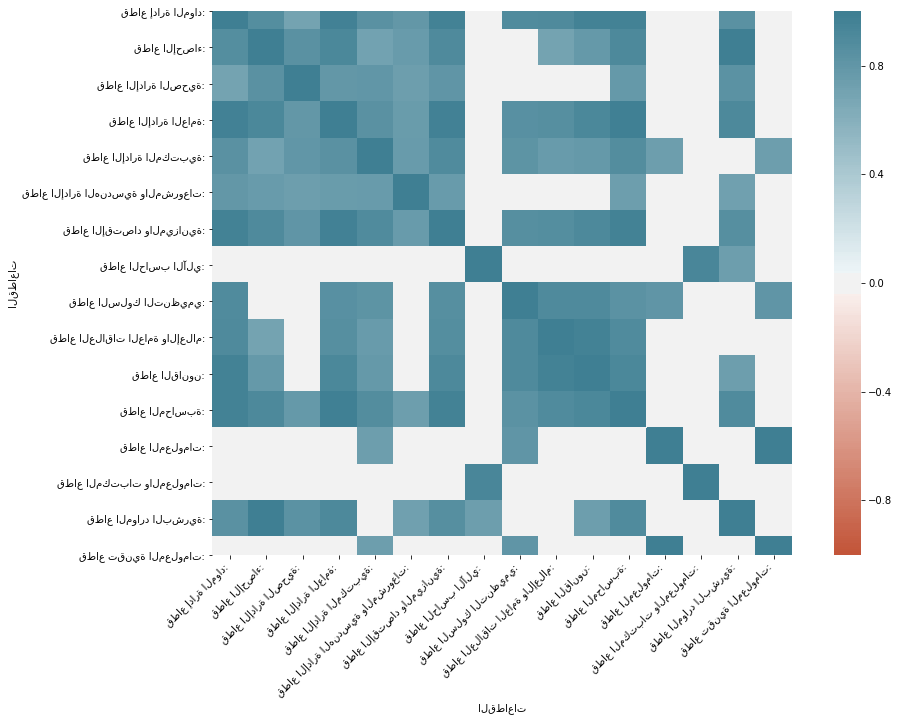

In [76]:
corr = pub.pivot_table(values='المنتظمون', columns= 'القطاعات', index= 'السنة', fill_value=0).corr()
corr[(corr.values < .7) & (corr.values >-0.7)] = 0
corr_plt(corr)

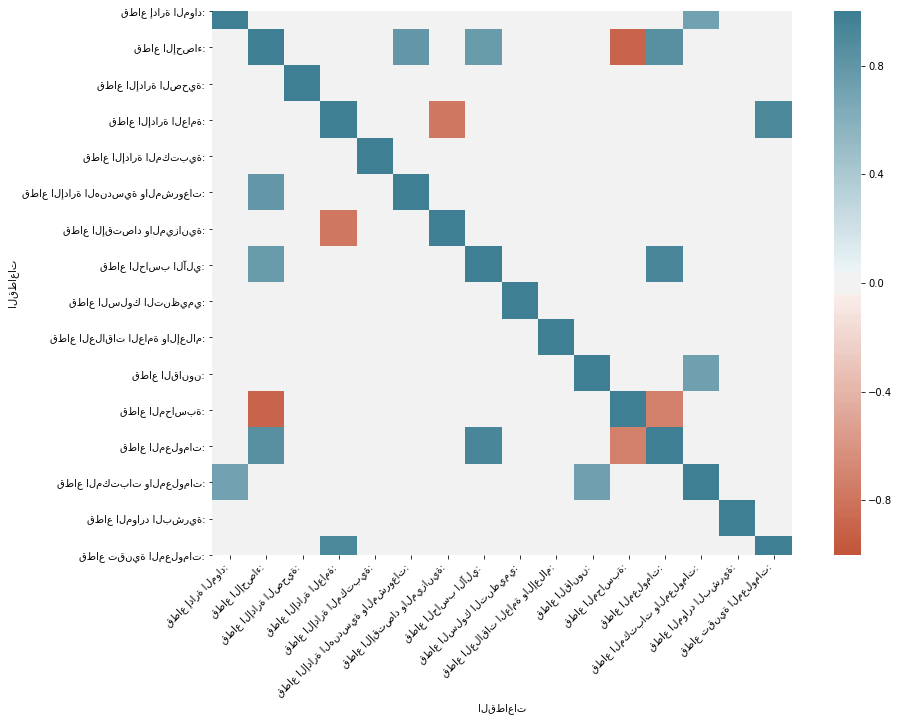

In [77]:
corr = privt.pivot_table(values='المنتظمون', columns= 'القطاعات', index= 'السنة', fill_value=0).corr()
corr[(corr.values < .7) & (corr.values >-0.7)] = 0
corr_plt(corr)

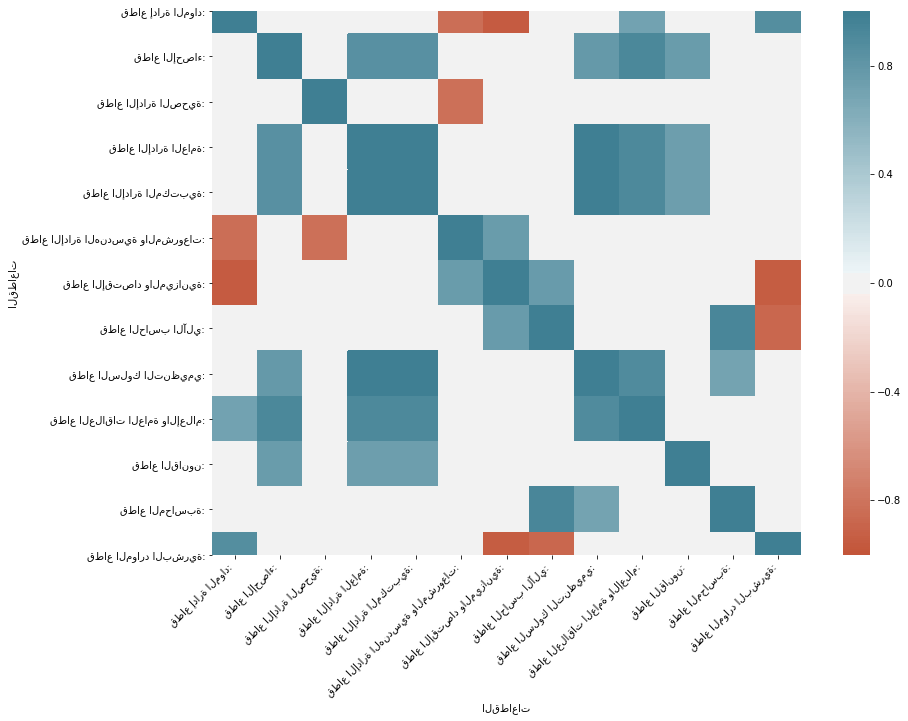

In [78]:
corr = bus.pivot_table(values='المنتظمون', columns= 'القطاعات', index= 'السنة', fill_value=0).corr()
corr[(corr.values < .7) & (corr.values >-0.7)] = 0
corr_plt(corr)

In [79]:
pub_sec = pub[['السنة', 'القطاعات', 'المنتظمون']].groupby(['القطاعات', 'السنة'])['المنتظمون'].sum().reset_index()
privt_sec = pub[['السنة', 'القطاعات', 'المنتظمون']].groupby(['القطاعات', 'السنة'])['المنتظمون'].sum().reset_index()
papp_sec = pub[['السنة', 'القطاعات', 'المنتظمون']].groupby(['القطاعات', 'السنة'])['المنتظمون'].sum().reset_index()
bus_sec = pub[['السنة', 'القطاعات', 'المنتظمون']].groupby(['القطاعات', 'السنة'])['المنتظمون'].sum().reset_index()

In [80]:
privt_sec.pivot_table(columns='القطاعات', values='المنتظمون', index= 'السنة')

القطاعات,قطاع إدارة المواد:,قطاع الإحصاء:,قطاع الإدارة الصحية:,قطاع الإدارة العامة:,قطاع الإدارة المكتبية:,قطاع الإدارة الهندسية والمشروعات:,قطاع الإقتصاد والميزانية:,قطاع الحاسب الآلي:,قطاع السلوك التنظيمي:,قطاع العلاقات العامة والإعلام:,قطاع القانون:,قطاع المحاسبة:,قطاع المعلومات:,قطاع المكتبات والمعلومات:,قطاع الموارد البشرية:,قطاع تقنية المعلومات:
السنة,,,,,,,,,,,,,,,,
2007,1705.0,1272.0,919.0,5327.0,13307.0,1355.0,542.0,2071.0,5071.0,1070.0,1423.0,2643.0,NaN,1097.0,3928.0,NaN
2008,1918.0,1462.0,908.0,6682.0,13695.0,1316.0,804.0,2385.0,6456.0,860.0,1720.0,3056.0,NaN,1190.0,3542.0,NaN
2009,2424.0,1674.0,1317.0,7286.0,10224.0,1541.0,720.0,3107.0,5266.0,906.0,2576.0,3430.0,NaN,1306.0,3482.0,NaN
2010,2145.0,1858.0,1000.0,5634.0,10792.0,1657.0,842.0,3247.0,4071.0,1423.0,2424.0,2993.0,NaN,1887.0,2942.0,NaN
2011,1886.0,2164.0,1732.0,6045.0,13651.0,1727.0,902.0,3438.0,4795.0,1341.0,1993.0,3909.0,NaN,2042.0,2945.0,NaN
2012,2878.0,2451.0,1623.0,7519.0,12713.0,2794.0,983.0,2746.0,5528.0,857.0,2240.0,3870.0,NaN,2195.0,4962.0,NaN
2013,3171.0,3165.0,2348.0,9944.0,16744.0,2602.0,1475.0,4500.0,7957.0,1545.0,2738.0,5669.0,NaN,2941.0,6502.0,NaN
2014,3647.0,4290.0,2504.0,10044.0,16867.0,2156.0,1846.0,7028.0,9071.0,1637.0,3216.0,6271.0,NaN,2808.0,7699.0,NaN
2015,4840.0,4655.0,1747.0,13710.0,20380.0,2199.0,1943.0,7670.0,15193.0,2731.0,4207.0,8720.0,NaN,2667.0,8730.0,NaN


# Prediction

Prediction will be done for 3 Training Programs: <br>
- Training Programs for public
- Training Programs for private
- Training Programs for prepatory

### Predicting Num of Joiners in Public Training 

Public Training Students for 2017 Utilizing Mean =  63118.40
predicted [[109068.64862706]
 [135831.08298957]]
Actual [ 99392. 103580.]
LR R^2 =  -128.28304304328503
Num Pubulic Training for 2017 utilizing LR =  [[161744.3897675]]
------------------------------------------------------------
predicted [50965.81940649 50965.78025157]
Actual [ 99392. 103580.]
svr R^2 =  -582.0721019682353
Num Pubulic Training for 2017 utilizing SVM =  [50965.78024699]
------------------------------------------------------------
predicted [74725.741 74725.741]
Actual [ 99392. 103580.]
RF R^2 =  -163.3154493684784
Num Pubulic Training for 2017 utilizing RF=  [74725.741]
------------------------------------------------------------
Lowest Model parameters are:  ((1, 2, 0), 128.02747800205842)
AIC =  128.02747800205842
Num Pubulic Training for 2017 =  131624.60


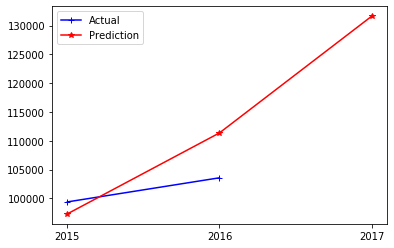

In [117]:
pub_yr = pub[['السنة', 'المنتظمون']].groupby(['السنة'])['المنتظمون'].sum().reset_index()

#Utilizing Mean
print('Public Training Students for 2017 Utilizing Mean = ', '{:.2F}'.format(pub_yr['المنتظمون'].mean()))


# Perform Forecasting By converting Time Series to Supervised Learning
pub_yr = pub[['السنة', 'المنتظمون']].groupby(['السنة'])['المنتظمون'].sum().reset_index()
pub_yr.set_index('السنة', inplace=True)

#Framing data to enable forecasting time series as supervised learning - Linear Regression & SVM are utilized
shifted_pub_yr = pub_yr.copy()
shifted_pub_yr['y-1'] = shifted_pub_yr['المنتظمون'].shift(1)
shifted_pub_yr['y+1'] = shifted_pub_yr['المنتظمون'].shift(-1)
shifted_pub_yr.dropna(how='any', inplace=True)

#Splitting data for training and testing
X = shifted_pub_yr.iloc[:, : -1].values
y = shifted_pub_yr.iloc[:, -1:].values
X_train, X_test, y_train, y_test = X[:-2], X[-2:], y[:-2], y[-2:]


#Apply Linear Regression Prediction (Forecasting)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print('predicted', lr.predict(X_test))
print('Actual', y_test.ravel())
print('LR R^2 = ', lr.score(X_test, y_test))
#Financial Accounting Forecasting for 2018
print('Num Pubulic Training for 2017 utilizing LR = ', lr.predict([[103580.0, 99392.0]]))
print ('------------------------------------------------------------')



#Apply SVM Prediction (Forecasting)
from sklearn.svm import SVR
svr = SVR(gamma='scale', C=1, kernel='rbf')
svr.fit(X_train, y_train.ravel())
print('predicted', svr.predict(X_test))
print('Actual', y_test.ravel())
print('svr R^2 = ', svr.score(X_test, y_test.ravel()))
#Financial Accounting Forecasting for 2018
print('Num Pubulic Training for 2017 utilizing SVM = ', svr.predict([[103580.0, 99392.0]]))
print ('------------------------------------------------------------')


#Apply Randomforest Prediction (Forecasting)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, max_depth=2, random_state=42)
rfr.fit(X_train, y_train.ravel())
print('predicted', rfr.predict(X_test))
print('Actual', y_test.ravel())
print('RF R^2 = ', rfr.score(X_test, y_test.ravel()))
#Financial Accounting Forecasting for 2018
print('Num Pubulic Training for 2017 utilizing RF= ', rfr.predict([[103580.0, 99392.0]]))
print ('------------------------------------------------------------')


#Perform Forecasting Using Time Series ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

#devide data for train and test
X = pub_yr.values
X_train, X_test= X[:-2], X[-2:]
X_train = X_train.ravel().astype('float32')
X_test = X_test.ravel().astype('float32')
predictions = []


#Find best combinations between p,d,q
import itertools
import warnings
warnings.filterwarnings('ignore')
p=d=q= range(0,5)
pdq = list(itertools.product(p,d,q))
comb = []
for parm in pdq:
    try:
        arima_mod = ARIMA(X_train, order = parm)
        arima_mod_fit = arima_mod.fit()
        comb.append((parm, arima_mod_fit.aic))
    except:
        continue
        
lowest=[(0,0,0), 100000]
for i, v in enumerate(comb):
    if comb[i][1] < lowest[1]:
        lowest = comb[i]
        
print('Lowest Model parameters are: ', lowest)


#Selecting best model and perform forecasting
arima_mod = ARIMA(X_train, order= lowest[0])
arima_mod_fit = arima_mod.fit()
print('AIC = ', arima_mod_fit.aic)

#predictions
predictions = arima_mod_fit.forecast(steps = 3)[0]

plt.xticks(range(0,3), range(2015, 2018))
plt.plot(X_test, 'b-+', label= 'Actual')
plt.plot(predictions, 'r-*', label= 'Prediction')
plt.legend();

print('Num Pubulic Training for 2017 = ', '{:.2F}'.format(predictions[2]))

### Predicting Num of Joiners in Private Training 

Private Training Students for 2017 Utilizing Mean =  1658.50
predicted [[1990.89150131]
 [2118.0546314 ]]
Actual [1170.  681.]
LR R^2 =  -21.908810773998226
Num Private Training for 2017 utilizing LR =  [[2223.66979969]]
------------------------------------------------------------
predicted [1820.0581791  1819.49484088]
Actual [1170.  681.]
svr R^2 =  -13.375534887694482
Num Private Training for 2017 utilizing SVM =  [1819.3898602]
------------------------------------------------------------
predicted [2020.8415 2020.8415]
Actual [1170.  681.]
RF R^2 =  -20.06972205071491
Num Private Training for 2017 utilizing RF=  [2020.8415]
------------------------------------------------------------
Lowest Model parameters are:  ((0, 2, 1), 95.28291718447392)
AIC =  95.28291718447392
Num Private Training for 2017 =  662.40


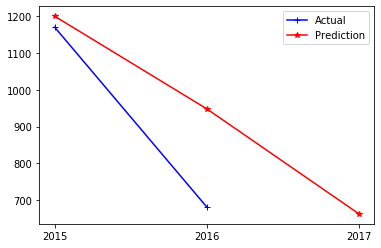

In [133]:
privt_yr = privt[['السنة', 'المنتظمون']].groupby(['السنة'])['المنتظمون'].sum().reset_index()
privt_yr.set_index('السنة', inplace=True)


#Utilizing Mean
print('Private Training Students for 2017 Utilizing Mean = ', '{:.2F}'.format(privt_yr['المنتظمون'].mean()))

# Perform Forecasting By converting Time Series to Supervised Learning

#Framing data to enable forecasting time series as supervised learning - Linear Regression & SVM are utilized
shifted_privt_yr = privt_yr.copy()
shifted_privt_yr['y-1'] = shifted_privt_yr['المنتظمون'].shift(1)
shifted_privt_yr['y+1'] = shifted_privt_yr['المنتظمون'].shift(-1)
shifted_privt_yr.dropna(how='any', inplace=True)

#Splitting data for training and testing
X = shifted_privt_yr.iloc[:, : -1].values
y = shifted_privt_yr.iloc[:, -1:].values
X_train, X_test, y_train, y_test = X[:-2], X[-2:], y[:-2], y[-2:]


#Framing data to enable forecasting time series as supervised learning - Linear Regression & SVM are utilized
shifted_privt_yr = privt_yr.copy()
shifted_privt_yr['y-1'] = shifted_privt_yr['المنتظمون'].shift(1)
shifted_privt_yr['y+1'] = shifted_privt_yr['المنتظمون'].shift(-1)
shifted_privt_yr.dropna(how='any', inplace=True)

#Splitting data for training and testing
X = shifted_privt_yr.iloc[:, : -1].values
y = shifted_privt_yr.iloc[:, -1:].values
X_train, X_test, y_train, y_test = X[:-2], X[-2:], y[:-2], y[-2:]


#Apply Linear Regression Prediction (Forecasting)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print('predicted', lr.predict(X_test))
print('Actual', y_test.ravel())
print('LR R^2 = ', lr.score(X_test, y_test))
#Financial Accounting Forecasting for 2018
print('Num Private Training for 2017 utilizing LR = ', lr.predict([[681.0, 1170.0]]))
print ('------------------------------------------------------------')



#Apply SVM Prediction (Forecasting)
from sklearn.svm import SVR
svr = SVR(gamma='scale', C=1, kernel='rbf')
svr.fit(X_train, y_train.ravel())
print('predicted', svr.predict(X_test))
print('Actual', y_test.ravel())
print('svr R^2 = ', svr.score(X_test, y_test.ravel()))
#Financial Accounting Forecasting for 2018
print('Num Private Training for 2017 utilizing SVM = ', svr.predict([[681.0, 1170.0]]))
print ('------------------------------------------------------------')


#Apply Randomforest Prediction (Forecasting)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, max_depth=2, random_state=42)
rfr.fit(X_train, y_train.ravel())
print('predicted', rfr.predict(X_test))
print('Actual', y_test.ravel())
print('RF R^2 = ', rfr.score(X_test, y_test.ravel()))
#Financial Accounting Forecasting for 2018
print('Num Private Training for 2017 utilizing RF= ', rfr.predict([[681.0, 1170.0]]))
print ('------------------------------------------------------------')


#Perform Forecasting Using Time Series ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

#devide data for train and test
X = privt_yr.values
X_train, X_test= X[:-2], X[-2:]
X_train = X_train.ravel().astype('float32')
X_test = X_test.ravel().astype('float32')
predictions = []


#Find best combinations between p,d,q
import itertools
import warnings
warnings.filterwarnings('ignore')
p=d=q= range(0,5)
pdq = list(itertools.product(p,d,q))
comb = []
for parm in pdq:
    try:
        arima_mod = ARIMA(X_train, order = parm)
        arima_mod_fit = arima_mod.fit()
        comb.append((parm, arima_mod_fit.aic))
    except:
        continue
        
lowest=[(0,0,0), 100000]
for i, v in enumerate(comb):
    if comb[i][1] < lowest[1]:
        lowest = comb[i]
        
print('Lowest Model parameters are: ', lowest)


#Selecting best model and perform forecasting
arima_mod = ARIMA(X_train, order= lowest[0])
arima_mod_fit = arima_mod.fit()
print('AIC = ', arima_mod_fit.aic)

#predictions
predictions = arima_mod_fit.forecast(steps = 3)[0]

plt.xticks(range(0,3), range(2015, 2018))
plt.plot(X_test, 'b-+', label= 'Actual')
plt.plot(predictions, 'r-*', label= 'Prediction')
plt.legend();

print('Num Private Training for 2017 = ', '{:.2F}'.format(predictions[2]))

### Predicting Num of Joiners in Preparatory Training 

Private Training Students for 2017 Utilizing Mean =  1443.40
Preparatory Training Students for 2017 Utilizing Mean =  1443.40
predicted [[1542.6127853 ]
 [1378.10685287]]
Actual [1645. 1284.]
LR R^2 =  0.7032060605567231
Num Preparatory Training for 2017 utilizing LR =  [[1519.72362514]]
------------------------------------------------------------
predicted [1392.5680628  1389.86808809]
Actual [1645. 1284.]
svr R^2 =  -0.14992879111349566
Num Preparatory Training for 2017 utilizing SVM =  [1391.40255046]
------------------------------------------------------------
predicted [1517.7885  1422.85925]
Actual [1645. 1284.]
RF R^2 =  0.4557338104708746
Num Preparatory Training for 2017 utilizing RF=  [1476.53983333]
------------------------------------------------------------
Lowest Model parameters are:  ((4, 1, 1), 80.89083395695293)
AIC =  80.89083395695293
Num Preparatory Training for 2017 =  1831.72


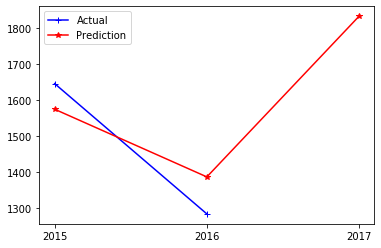

In [134]:
papp_yr = papp[['السنة', 'المنتظمون']].groupby(['السنة'])['المنتظمون'].sum().reset_index()

#Utilizing Mean
print('Private Training Students for 2017 Utilizing Mean = ', '{:.2F}'.format(papp_yr['المنتظمون'].mean()))


# Perform Forecasting By converting Time Series to Supervised Learning
papp_yr.set_index('السنة', inplace=True)

#Framing data to enable forecasting time series as supervised learning - Linear Regression & SVM are utilized
shifted_papp_yr = papp_yr.copy()
shifted_papp_yr['y-1'] = shifted_papp_yr['المنتظمون'].shift(1)
shifted_papp_yr['y+1'] = shifted_papp_yr['المنتظمون'].shift(-1)
shifted_papp_yr.dropna(how='any', inplace=True)

#Splitting data for training and testing
X = shifted_papp_yr.iloc[:, : -1].values
y = shifted_papp_yr.iloc[:, -1:].values
X_train, X_test, y_train, y_test = X[:-2], X[-2:], y[:-2], y[-2:]


#Utilizing Mean
print('Preparatory Training Students for 2017 Utilizing Mean = ', '{:.2F}'.format(papp_yr['المنتظمون'].mean()))


# Perform Forecasting By converting Time Series to Supervised Learning

#Framing data to enable forecasting time series as supervised learning - Linear Regression & SVM are utilized
shifted_papp_yr = papp_yr.copy()
shifted_papp_yr['y-1'] = shifted_papp_yr['المنتظمون'].shift(1)
shifted_papp_yr['y+1'] = shifted_papp_yr['المنتظمون'].shift(-1)
shifted_papp_yr.dropna(how='any', inplace=True)

#Splitting data for training and testing
X = shifted_papp_yr.iloc[:, : -1].values
y = shifted_papp_yr.iloc[:, -1:].values
X_train, X_test, y_train, y_test = X[:-2], X[-2:], y[:-2], y[-2:]


#Apply Linear Regression Prediction (Forecasting)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print('predicted', lr.predict(X_test))
print('Actual', y_test.ravel())
print('LR R^2 = ', lr.score(X_test, y_test))
#Financial Accounting Forecasting for 2018
print('Num Preparatory Training for 2017 utilizing LR = ', lr.predict([[1284.0, 1645.0]]))
print ('------------------------------------------------------------')



#Apply SVM Prediction (Forecasting)
from sklearn.svm import SVR
svr = SVR(gamma='scale', C=1, kernel='rbf')
svr.fit(X_train, y_train.ravel())
print('predicted', svr.predict(X_test))
print('Actual', y_test.ravel())
print('svr R^2 = ', svr.score(X_test, y_test.ravel()))
#Financial Accounting Forecasting for 2018
print('Num Preparatory Training for 2017 utilizing SVM = ', svr.predict([[1284.0, 1645.0]]))
print ('------------------------------------------------------------')


#Apply Randomforest Prediction (Forecasting)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, max_depth=2, random_state=42)
rfr.fit(X_train, y_train.ravel())
print('predicted', rfr.predict(X_test))
print('Actual', y_test.ravel())
print('RF R^2 = ', rfr.score(X_test, y_test.ravel()))
#Financial Accounting Forecasting for 2018
print('Num Preparatory Training for 2017 utilizing RF= ', rfr.predict([[1284.0, 1645.0]]))
print ('------------------------------------------------------------')


#Perform Forecasting Using Time Series ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

#devide data for train and test
X = papp_yr.values
X_train, X_test= X[:-2], X[-2:]
X_train = X_train.ravel().astype('float32')
X_test = X_test.ravel().astype('float32')
predictions = []


#Find best combinations between p,d,q
import itertools
import warnings
warnings.filterwarnings('ignore')
p=d=q= range(0,5)
pdq = list(itertools.product(p,d,q))
comb = []
for parm in pdq:
    try:
        arima_mod = ARIMA(X_train, order = parm)
        arima_mod_fit = arima_mod.fit()
        comb.append((parm, arima_mod_fit.aic))
    except:
        continue
        
lowest=[(0,0,0), 100000]
for i, v in enumerate(comb):
    if comb[i][1] < lowest[1]:
        lowest = comb[i]
        
print('Lowest Model parameters are: ', lowest)


#Selecting best model and perform forecasting
arima_mod = ARIMA(X_train, order= lowest[0])
arima_mod_fit = arima_mod.fit()
print('AIC = ', arima_mod_fit.aic)

#predictions
predictions = arima_mod_fit.forecast(steps = 3)[0]

plt.xticks(range(0,3), range(2015, 2018))
plt.plot(X_test, 'b-+', label= 'Actual')
plt.plot(predictions, 'r-*', label= 'Prediction')
plt.legend();

print('Num Preparatory Training for 2017 = ', '{:.2F}'.format(predictions[2]))